## Problem Statement

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

We need to do a  profiling of the best companies and job positions to work for from the Scaler database. We are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

### Exploratory Data Analysis

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import re

In [223]:
df=pd.read_csv('scaler_clustering.csv')

In [224]:
df

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
...,...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,NaN,2019.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,NaN,2020.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,NaN,2021.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,NaN,2019.0


In [225]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 205843
Number of Columns: 7


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


categorical features would be job_position

continuous feature would be ctc

org year and ctc_updated year should be in date format

In [227]:
df['job_position'].nunique()

1016

There are 1016 unique job positions in the dataset.

#### Statistical Summary

In [228]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


1. Average employment Start Date is 2014
2. Max Employment is most likely 2016 as in the records it must have been incorrectly been entered as 20165
3. Average CTC for a person is 2271685 and maximum ctc being 1000150000
4. Average increment to a ctc was made in year 2019

#### Missing value Detection

In [229]:
df.isna().sum()

Unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

1. There are 44 null values in column company_hash
2. There are 86 null values in the column orgyyear
3. There are 52564 null values in column job_position

#### KNN imputation

In [230]:
dfnums=df.select_dtypes(np.number)

In [231]:
dfnums.head()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
0,0,2016.0,1100000,2020.0
1,1,2018.0,449999,2019.0
2,2,2015.0,2000000,2020.0
3,3,2017.0,700000,2019.0
4,4,2017.0,1400000,2019.0


In [232]:
dfnums=dfnums.drop(columns='Unnamed: 0')

In [233]:
dfnums.head()

,orgyear,ctc,ctc_updated_year
0,2016.0,1100000,2020.0
1,2018.0,449999,2019.0
2,2015.0,2000000,2020.0
3,2017.0,700000,2019.0
4,2017.0,1400000,2019.0


In [234]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(dfnums)
# transform the dataset
dfnums = imputer.transform(dfnums)

In [235]:
dfnums=pd.DataFrame(dfnums)

In [236]:
dfnums

,0,1,2
0,2016.0,1100000.0,2020.0
1,2018.0,449999.0,2019.0
2,2015.0,2000000.0,2020.0
3,2017.0,700000.0,2019.0
4,2017.0,1400000.0,2019.0
...,...,...,...
205838,2008.0,220000.0,2019.0
205839,2017.0,500000.0,2020.0
205840,2021.0,700000.0,2021.0
205841,2019.0,5100000.0,2019.0


In [237]:
dfnums.isna().sum()

0    0
1    0
2    0
dtype: int64

**knn imputation fills all null values of orgyear**

In [238]:
cols=['orgyear','ctc','ctc_updated_year']

In [239]:
dfnums.columns=cols

In [240]:
dfnums['orgyear']=dfnums['orgyear'].astype('int32')

In [241]:
dfnums.isna().sum()

orgyear             0
ctc                 0
ctc_updated_year    0
dtype: int64

In [242]:
dfnums['orgyear'].unique()

array([ 2016,  2018,  2015,  2017,  2019,  2020,  2012,  2013,  2003,
        2006,  2014,  2011,  2021,  2008,  2004,  2022,  2009,  2005,
        2010,  2007,  2000,  2002,  2023,  2001,  1981,  2031,  2024,
        1996,  1999,  2106,  1997,  1994,  1995,  1992,  1973,  1991,
        1998,  1990,  1993,  1988,  2025,  2029,     0,   208,  1985,
         209,   206,  1982,  2026,  1970,  2101,  1972,  2107,  1986,
        1989,    91,  1987,     3,  2027,     2,  1976,     4,     5,
        1971,  1977,  1984,    83,     1,  1979,  2028,  2204,    38,
        1900,   201,     6, 20165,   200])

In [243]:
dfnums['orgyear'].nunique()

77

**Dataset contains learners records of entering a company for 77 different years**

In [244]:
dfnums['ctc_updated_year']=dfnums['ctc_updated_year'].astype('int32')

In [245]:
dfnums['ctc_updated_year'].unique()

array([2020, 2019, 2021, 2017, 2016, 2015, 2018])

**Dataset has records of promotion of learners from 2015 to 2021**

.



**Converting ctc_updated_year to year format**

In [246]:
df['ctc_updated_year']=pd.to_datetime(df['ctc_updated_year'], format='%Y').dt.year

In [247]:
dfnums.head()

,orgyear,ctc,ctc_updated_year
0,2016,1100000.0,2020
1,2018,449999.0,2019
2,2015,2000000.0,2020
3,2017,700000.0,2019
4,2017,1400000.0,2019


In [248]:
dfnums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   orgyear           205843 non-null  int32  
 1   ctc               205843 non-null  float64
 2   ctc_updated_year  205843 non-null  int32  
dtypes: float64(1), int32(2)
memory usage: 3.1 MB


    

 **Concatenating the knn imputed data to old Dataset**


In [249]:
dnew=pd.concat([dfnums, df[['company_hash', 'email_hash','job_position']]],axis=1)

In [250]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer


In [251]:
dnew.isna().sum()

orgyear                 0
ctc                     0
ctc_updated_year        0
company_hash           44
email_hash              0
job_position        52564
dtype: int64

**Filling Null data of company_hash and job position with Not Known string**

In [252]:
dnew['company_hash']=dnew['company_hash'].fillna('Not Known')

In [253]:
dnew['job_position']=dnew['job_position'].fillna('Not Known')

In [254]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer


#### Handling Duplicates

In [255]:
dnew.duplicated().sum()

34

In [256]:
dnew.drop_duplicates(inplace=True)

In [257]:
dnew['email_hash'].duplicated().sum()

52366

**There are Duplicates in the column email hash. so we can say there are duplicate data for Learners.**

In [258]:
dnew['email_hash'].value_counts()

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183     8
                                                                    ..
63933d31becd1487d93d56844919896334e3ae39c4095979816c6fbb8816153a     1
23bcc14067e0fec60b8772b3e20abbb8fa9f2146738d37056e0d20d33a97c690     1
5a1c9d9a745d6ee95136047698dba8f68f00bac522de6d83d18cf062f7286e22     1
062597458dc597d35b2dbf3e417ac160244dc8c3dd50fce716837dc1e6fc7a10     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: count, Length: 153443, dtype: int64

In [259]:
dnew[dnew['email_hash']=='bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b']


,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position
24109,2018,720000.0,2020,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Not Known
45984,2018,720000.0,2020,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Support Engineer
72315,2018,720000.0,2020,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Other
102915,2018,720000.0,2020,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,FullStack Engineer
117764,2018,720000.0,2020,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Data Analyst
121483,2018,660000.0,2019,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Other
124476,2018,660000.0,2019,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Support Engineer
144479,2018,660000.0,2019,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,FullStack Engineer
152801,2018,660000.0,2019,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Devops Engineer
159835,2018,660000.0,2019,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Not Known


**Within same joining year and ctc updated year a single learner holdss multiple positions and different ctc which cannot be true so we delete all duplicates and keep only first occouring record**

In [260]:
dnew.drop_duplicates(subset=['email_hash'], keep='first',inplace=True)

In [261]:
dnew['email_hash'].duplicated().sum()

0

In [262]:
dnew=dnew.reset_index(drop=True)

#### Data Cleaning

In [263]:
dnew[dnew['orgyear']>dnew['ctc_updated_year']].head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position
8,2020,450000.0,2019,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,Not Known
17,2020,1400000.0,2019,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...,Not Known
40,2021,2500000.0,2020,rvqotz nghmqg,96b1eb6b3ba24764239d502e3e5d9353af9dbd20594534...,Other
48,2020,3010000.0,2019,rgfto wgbuvzxto xzw,7ce201f4f032c2af65b5d11f549de91ea3e62920834e72...,Not Known
56,2020,700000.0,2019,axztqg xzzgcvnxgz ucn rna,3a8a6f0924d0d337eb63d8f6c6b6a3608913b7e4c95353...,Frontend Engineer


In [264]:
dnew[dnew['orgyear']>dnew['ctc_updated_year']].shape

(7186, 6)

**These records have wrong information as joining year cannot be greater than ctc_updated_year**

**so we swap the values of orgyear and ctc_updated_year**

In [265]:
condition = dnew['orgyear']>dnew['ctc_updated_year']
dnew.loc[condition, ['orgyear', 'ctc_updated_year']] = dnew.loc[condition, ['ctc_updated_year', 'orgyear']].values


In [266]:
dnew[dnew['orgyear']>dnew['ctc_updated_year']].shape

(0, 6)

In [267]:
dnew['orgyear'].unique()

array([2016, 2018, 2015, 2017, 2019, 2020, 2012, 2013, 2003, 2006, 2014,
       2011, 2008, 2004, 2009, 2005, 2010, 2007, 2000, 2002, 2021, 2001,
       1981, 1996, 1999, 1997, 1994, 1995, 1992, 1973, 1991, 1998, 1990,
       1993, 1988,    0,  208, 1985,  209,  206, 1982, 1970, 1972, 1986,
       1989,   91, 1987,    3,    2, 1976,    4,    5, 1971, 1977, 1984,
         83,    1, 1979,   38, 1900,  201,    6,  200])

In [268]:
dnew[dnew['orgyear']<1000].shape

(40, 6)

**We will delete these records where orgyear is less than 3 digits**

In [269]:
dnew=dnew.drop(dnew[dnew['orgyear']<1000].index)

In [270]:
dnew[dnew['orgyear']<1000].shape

(0, 6)

**Similarly for 'ctc_updated_year' we delete records greater than current year**

In [271]:
dnew['ctc_updated_year'].unique()

array([ 2020,  2019,  2021,  2022,  2017,  2023,  2031,  2024,  2106,
        2016,  2018,  2025,  2029,  2015,  2026,  2101,  2107,  2027,
        2204, 20165,  2028])

In [272]:
from datetime import datetime
current_year = datetime.now().year
dnew[dnew['ctc_updated_year']>current_year].shape

(23, 6)

In [273]:
dnew=dnew.drop(dnew[dnew['ctc_updated_year']>current_year].index)

In [274]:
dnew[dnew['ctc_updated_year']>current_year].shape

(0, 6)

In [275]:
dnew[dnew['ctc']<0].shape

(0, 6)

#### Remove special characters

In [276]:
dnew['company_hash'] = dnew['company_hash'].astype(str)

In [277]:
dnew['company_hash_cleaned'] = dnew['company_hash'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [278]:
dnew['email_hash'] = dnew['email_hash'].astype(str)

In [279]:
dnew['email_hash_cleaned'] = dnew['email_hash'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [280]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...


### Feature Engineering

#### Create new feature experience

In [281]:
dnew['YOE']=current_year-dnew['orgyear']

In [282]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned,YOE
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8


***From'CTC_updated_year', create a flag indicating if a person got an increment or promotion recent year.***

In [283]:
dnew['ctc_updated_year'].unique()

array([2020, 2019, 2021, 2022, 2017, 2023, 2024, 2016, 2018, 2025, 2015])

In [284]:
dnew['recent_promotion']=np.where(dnew['ctc_updated_year']==2023,1,0)

In [285]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0


***categorizing 'CTC' into bins like 'Low', 'Average', 'High' for a more generalized view.***

In [286]:
dnew['ctc'].min()

2.0

In [287]:
dnew['ctc'].max()

1000150000.0

In [288]:
bins=[0,500000,2000000,10000000,1000150000]
labels = ['Low', 'Average', 'High','very_high']
dnew['ctc_category'] = pd.cut(dnew['ctc'], bins=bins, labels=labels)

In [289]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average


In [290]:
dnew['ctc_category'].value_counts(normalize=True)

ctc_category
Average      0.576255
Low          0.237241
High         0.173119
very_high    0.013385
Name: proportion, dtype: float64

***Maximum learners fall under Average category.***
***Learners falling under very high income category are most likely outliers.***

#### Feature Mining from Aggregated Data:Derive new features from aggregateddata, like average CTC per company,role, or years of experience.

In [291]:
dnew['company_hash_cleaned'].nunique()

36318

In [292]:
dnew['avg_ctc_per_comp']=dnew.groupby('company_hash_cleaned')['ctc'].transform('mean')

In [293]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1.115667e+06
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2.478074e+06
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2.000000e+06
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1.683900e+06
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,8.480000e+05


In [294]:
dnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153380 entries, 0 to 153442
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   orgyear               153380 non-null  int32   
 1   ctc                   153380 non-null  float64 
 2   ctc_updated_year      153380 non-null  int32   
 3   company_hash          153380 non-null  object  
 4   email_hash            153380 non-null  object  
 5   job_position          153380 non-null  object  
 6   company_hash_cleaned  153380 non-null  object  
 7   email_hash_cleaned    153380 non-null  object  
 8   YOE                   153380 non-null  int32   
 9   recent_promotion      153380 non-null  int32   
 10  ctc_category          153380 non-null  category
 11  avg_ctc_per_comp      153380 non-null  float64 
dtypes: category(1), float64(2), int32(4), object(5)
memory usage: 11.8+ MB


In [295]:
dnew['avg_ctc_per_comp']=dnew['avg_ctc_per_comp'].astype('int64')

In [296]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000


In [297]:
dnew['avg_experience']=dnew.groupby('company_hash_cleaned')['YOE'].transform('mean')

In [298]:
dnew.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience
0,2016,1100000.0,2020,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666,10.111111
1,2018,449999.0,2019,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074,9.954955
2,2015,2000000.0,2020,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000,10.000000
3,2017,700000.0,2019,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900,9.620000
4,2017,1400000.0,2019,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000,9.000000


In [299]:
dnew['avg_experience']=dnew['avg_experience'].astype('int64')

In [300]:
data=dnew.copy()

In [301]:
data.drop(columns=['company_hash', 'email_hash'],axis=1,inplace=True)

In [302]:
data.head()

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience
0,2016,1100000.0,2020,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666,10
1,2018,449999.0,2019,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074,9
2,2015,2000000.0,2020,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000,10
3,2017,700000.0,2019,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900,9
4,2017,1400000.0,2019,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000,9


In [303]:
data['job_position'].value_counts().head(30)

job_position
Not Known                      33884
Backend Engineer               33140
FullStack Engineer             17162
Other                          13795
Frontend Engineer               8330
Engineering Leadership          5929
QA Engineer                     5698
Data Scientist                  4627
Android Engineer                4623
SDET                            4347
Devops Engineer                 4108
Support Engineer                2637
iOS Engineer                    2470
Data Analyst                    2227
Engineering Intern              1846
Product Designer                1231
Fullstack Engineer              1152
Backend Architect                983
Product Manager                  974
Research Engineers               850
Program Manager                  725
Database Administrator           465
Non Coder                        401
Co-founder                       310
Security Leadership              124
Release Engineer                 106
Senior  Software Engineer

***There are around 24 prominent job roles which will be useful for clustering***

#### Outlier Detection and Removal

In [304]:
nums=['ctc','YOE','avg_ctc_per_comp', 'avg_experience']
cat=['orgyyear','job_position', 'company_hash_cleaned', 'email_hash_cleaned','recent_promotion', 'ctc_category']

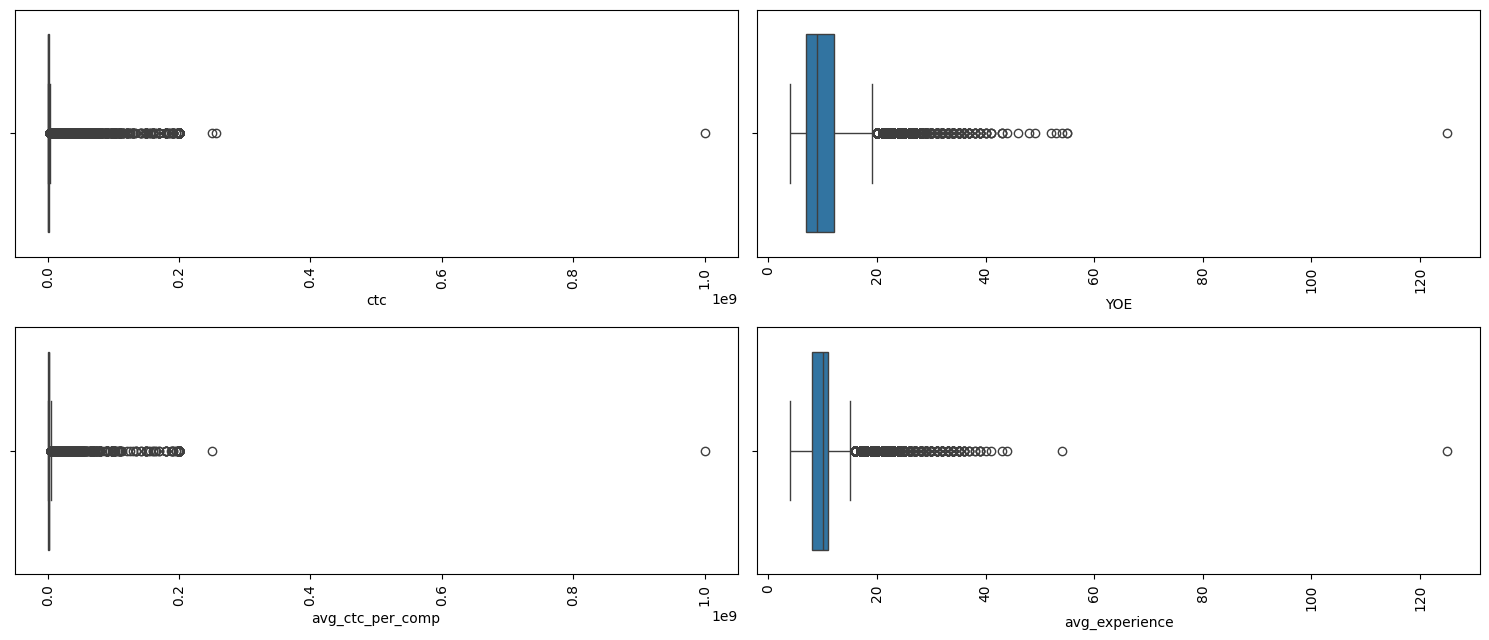

In [305]:
a=8 #rows
b=2 #columns
c=1
fig = plt.figure(figsize = (15,25))
for i in nums:
    plt.subplot(a, b, c)
    sns.boxplot(x=data[i])
    plt.xticks(rotation=90)
    c=c+1

plt.tight_layout()
plt.show() 

In [306]:
def removeOutlier(col,df):

    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1

    maxx = q3 + (1.5 * iqr)
    minn = q1 - (1.5 * iqr)
    
    return df.loc[(col>=minn) & (col<=maxx)]

In [307]:
for i in nums:
    data = removeOutlier(data[i],data)

In [308]:
data['ctc_category'].value_counts()

ctc_category
Average      81673
Low          32854
High         14634
very_high        0
Name: count, dtype: int64

***After outlier Removal Records of very High CTC category became zero***

##### Univariate Analysis

In [309]:
for i in data.columns:
    print("Counts of unique values in column",i,'\n')
    print(data[i].value_counts())
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2016    15910
2019    15423
2015    15371
2017    15167
2018    14732
2014    11916
2013     8935
2012     7563
2020     7255
2011     5588
2010     4010
2021     2016
2009     1906
2008     1340
2007     1080
2006      949
Name: count, dtype: int64

________________________________________

Counts of unique values in column ctc 

ctc
600000.0     5292
1000000.0    4878
400000.0     4762
500000.0     4486
800000.0     4422
             ... 
313000.0        1
3389000.0       1
785309.0        1
4160.0          1
3327000.0       1
Name: count, Length: 2219, dtype: int64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2019    43516
2021    35810
2020    31876
2018     6107
2017     5907
2016     3976
2015     1229
2022      571
2023      143
2024       20
2025        6
Name: count, dtype: int64

________________________________________

Counts of unique values in column job

<Axes: xlabel='ctc', ylabel='Density'>

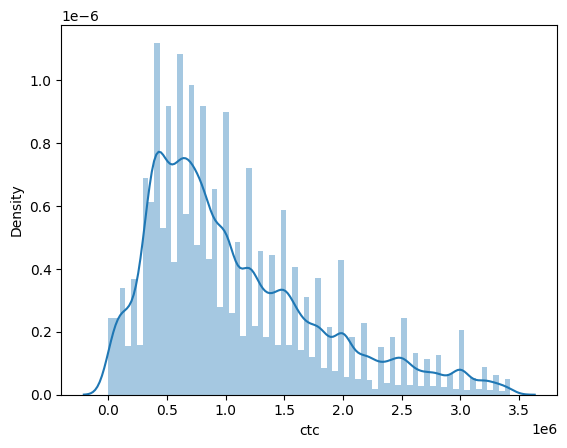

In [310]:
sns.distplot(data['ctc'],kde=True,bins=70)

**CTC ranges from 0 t0 3700000**

**Maximum people earn ctc in range 300000 to 1000000**

<Axes: xlabel='YOE', ylabel='Density'>

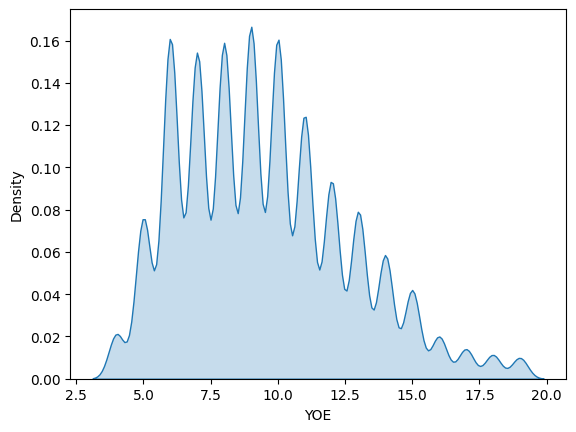

In [311]:
sns.kdeplot(data['YOE'],shade=True)

**There are learners with experience of 2 to 19 years**

**Maximum learners have experience of 5 to 10 years**

<Axes: xlabel='avg_ctc_per_comp', ylabel='Density'>

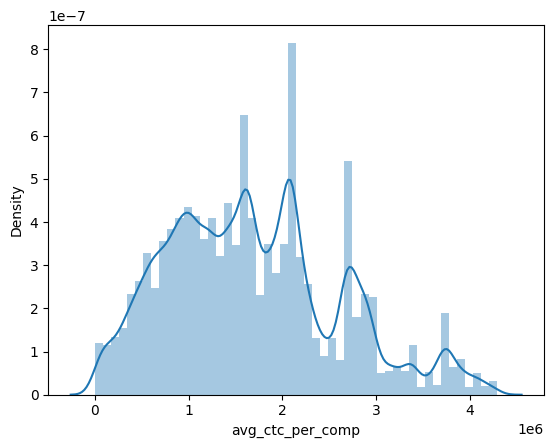

In [312]:
sns.distplot(data['avg_ctc_per_comp'],kde=True)

**Maximum companies provide average ctc of 1900000 to 2300000**

<Axes: xlabel='avg_experience', ylabel='Density'>

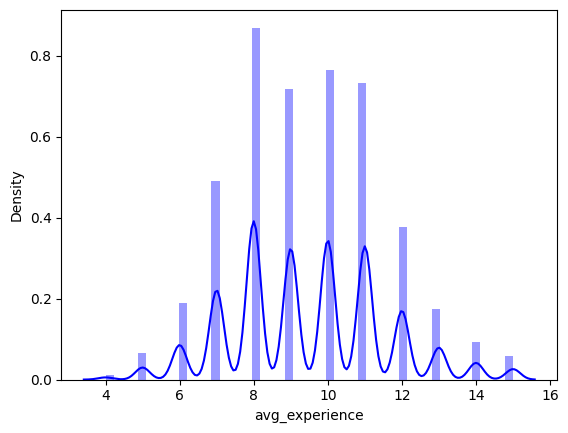

In [313]:
sns.distplot(data['avg_experience'],kde=True,color='blue')

**Most of the people have experience of 7 to 11 years**

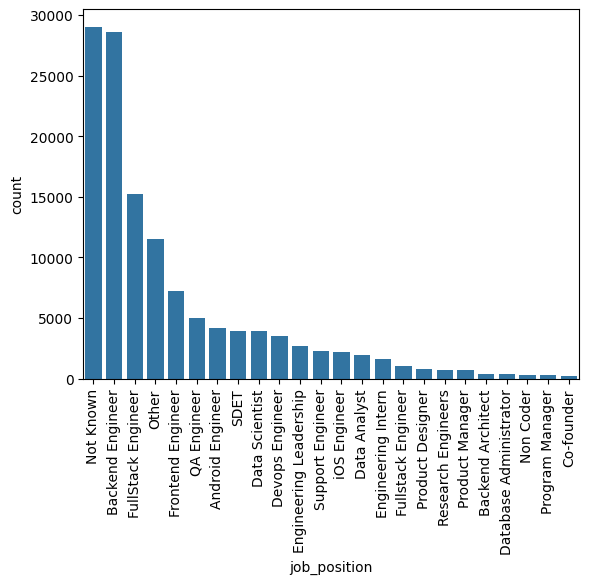

In [314]:
sns.countplot(data,x=data['job_position'],order=data['job_position'].value_counts().index[0:24])
plt.xticks(rotation=90)
plt.show()

**Most of the learners job position are not known maybe because they may have left the company which they used to work for**

**And a majority of learners hold the job position of Backend Engineer, FullStack Engineer,Other, FrontEnd Engineer,Android Engineer, QA Engineer or Data Scientist**

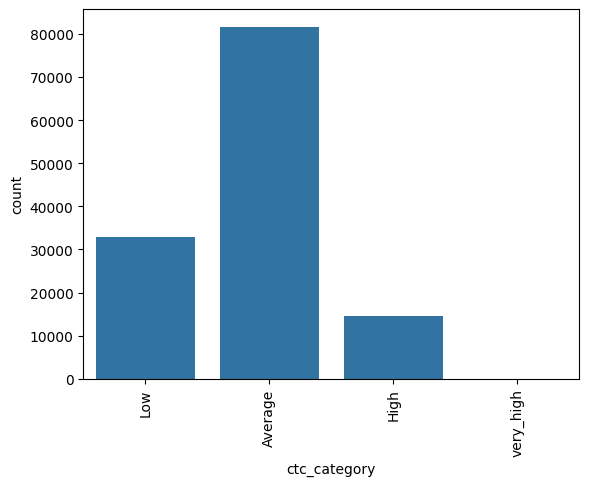

In [315]:
sns.countplot(data,x=data['ctc_category'])
plt.xticks(rotation=90)
plt.show()

**Most of learners belong to Average Income Category**

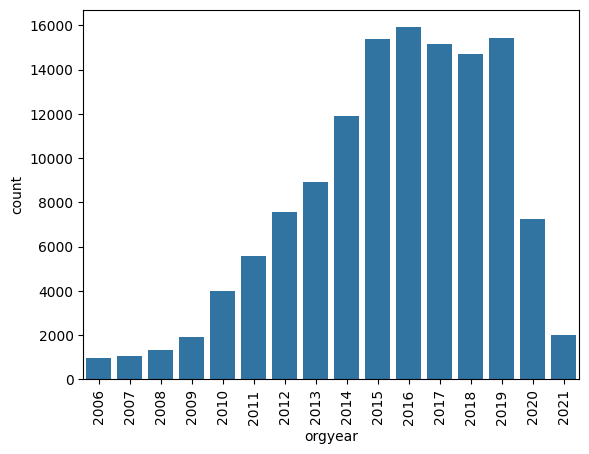

In [316]:
sns.countplot(data,x=data['orgyear'])
plt.xticks(rotation=90)
plt.show() 

**The Dataset contains Most of the Records of learners who joined the company in 2015 to 2019**

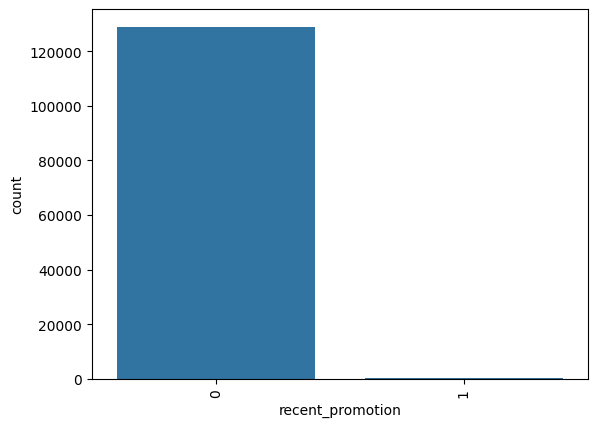

In [317]:
sns.countplot(data,x=data['recent_promotion'])
plt.xticks(rotation=90)
plt.show() 

**Very few or negligible amount of Learners got promoted in 2023**

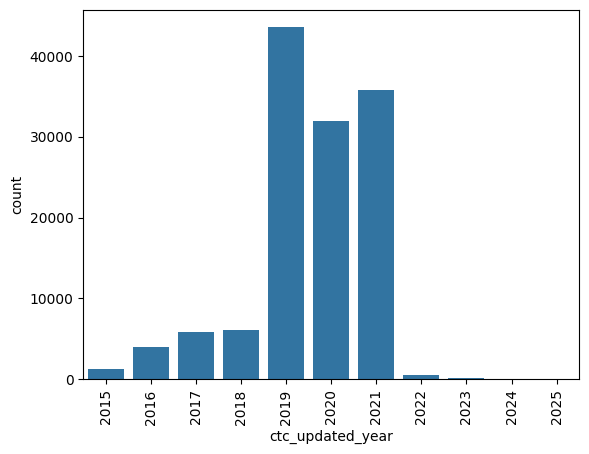

In [318]:
sns.countplot(data,x=data['ctc_updated_year'])
plt.xticks(rotation=90)
plt.show() 

**Most of the learners got salary increment in year 2019,2020 and 2021**

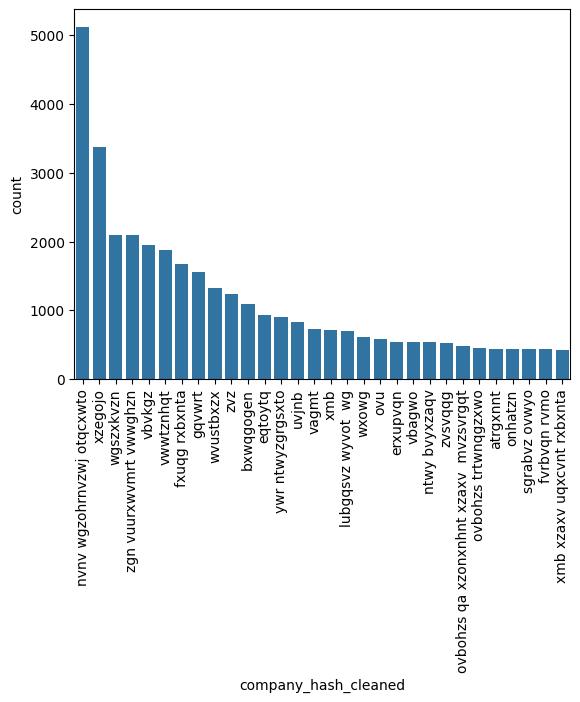

In [319]:
sns.countplot(data,x=data['company_hash_cleaned'],order=data['company_hash_cleaned'].value_counts().index[0:30])
plt.xticks(rotation=90)
plt.show() 

**Top 2 company with maximum learners are 'nvnu wgzohrnvzwj otqcxwto, and 'xzegojo'**

#### Bivariate analysis

**average CTC vs job positions**

In [320]:
prominent_jobs = data['job_position'].value_counts().index[0:24]
prominent_job_roles = data[data['job_position'].isin(prominent_jobs)]

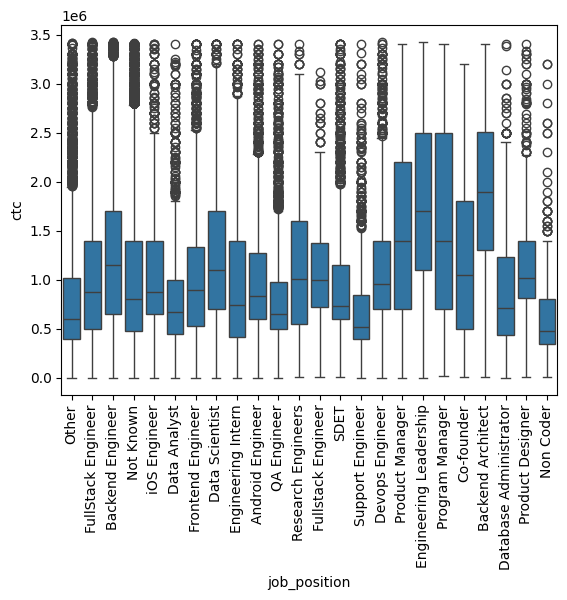

In [321]:
sns.boxplot(x='job_position', y='ctc', data=prominent_job_roles)
plt.xticks(rotation=90)
plt.show()

**Question: What is the Average ctc of learners across all job roles?**

Average ctc of learners across all job roles is between 300000 to 1900000

**Question: For a given company, how does the average CTC of a Data Scientist compare with other roles?**

In [322]:
data2=dnew.copy()

Let the given company be 'nvnu wgzohrnvzwj otqcxwto'

In [323]:
company_df = data2[data2['company_hash_cleaned'] == 'nvnv wgzohrnvzwj otqcxwto']

In [324]:
# Grouping  by job role and calculate average CTC
average_ctc_by_role = company_df.groupby('job_position')['ctc'].mean().reset_index()

# Compare the average CTC of Data Scientist with other roles
data_scientist_ctc = average_ctc_by_role[average_ctc_by_role['job_position'] == 'Data Scientist']['ctc'].mean()
other_roles_ctc = average_ctc_by_role[average_ctc_by_role['job_position'] != 'Data Scientist']['ctc'].mean()

print("Average CTC of Data Scientist:", data_scientist_ctc)
print("Average CTC of other roles:", other_roles_ctc)

Average CTC of Data Scientist: 780195.7323943662
Average CTC of other roles: 1365957.9434841678


**Question: Name a job position that is commonly considered entry-level but has a few learners with unusually high CTCs in the dataset**

In [325]:
data['job_position'].value_counts()[25:50]

job_position
Release Engineer                     82
Senior  Software Engineer            42
System Engineer                      23
Software Engineer (Backend)          22
Student                              16
SDE 2                                15
Software Development Engineer - I    15
Associate Software Engineer          14
Software  Engineer                   13
Intern                               13
Research Engineer                    12
Engineer                             12
SDE 1                                12
Project Engineer                     11
Consultant                           10
Software Engineer 2                   9
Assistant System Engineer             9
Senior Software Developer             7
Data Engineer                         7
Manual Tester                         7
Technology Analyst                    7
SDE-2                                 7
Lead Software Engineer                6
Software Engineer (Full stack)        6
Software Engineer II       

In [326]:
few_learners1 = data['job_position'].value_counts().index[25:50]

few_learners_roles1 = data[data['job_position'].isin(few_learners1)]

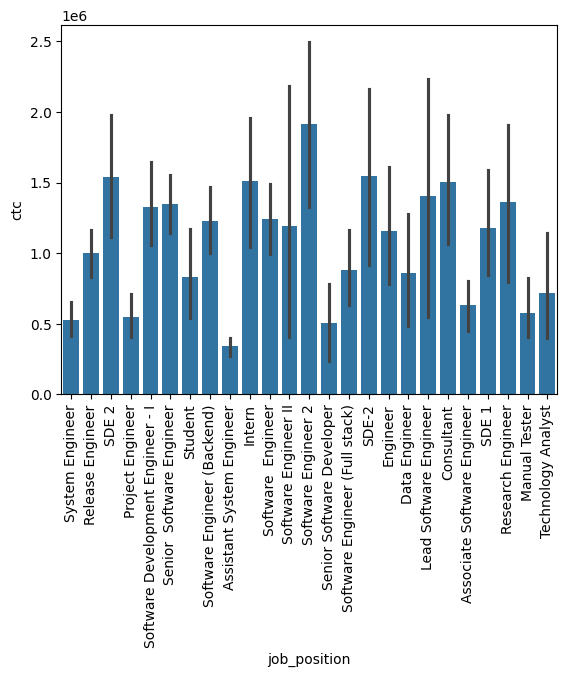

In [327]:
sns.barplot(x='job_position', y='ctc', data=few_learners_roles1)
plt.xticks(rotation=90)
plt.show()

In [328]:
few_learners2 = data['job_position'].value_counts().index[50:80]

few_learners_roles2 = data[data['job_position'].isin(few_learners2)]

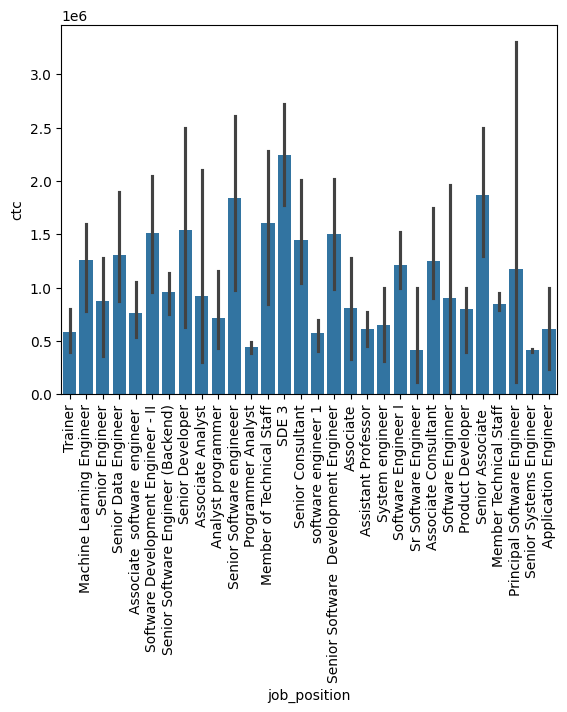

In [329]:
sns.barplot(x='job_position', y='ctc', data=few_learners_roles2)
plt.xticks(rotation=90)
plt.show()

A job position that is commonly considered entry-level but has a few learners with unusually high CTC is the role of Associate Software Engineer with salary upto 3000000.

**Is it always true that with an increase in years of experience, the CTC increases? Provide a case where this isn't true.**

<Axes: xlabel='YOE'>

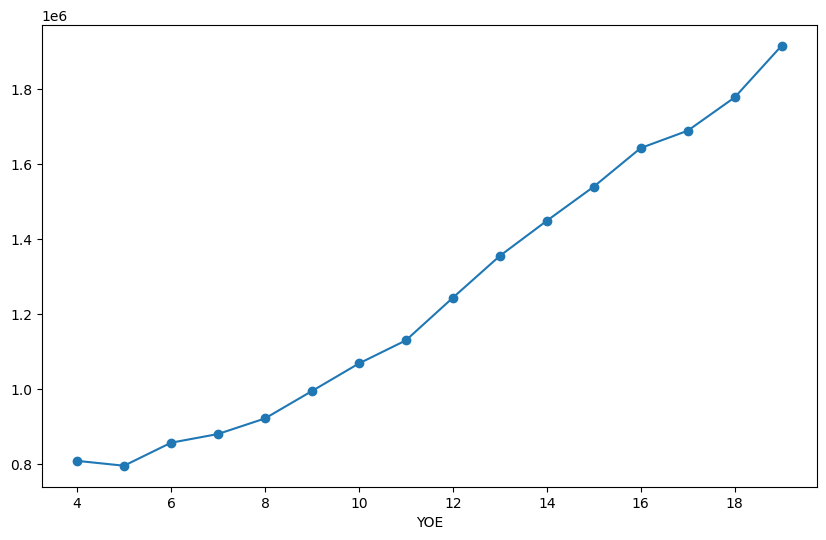

In [330]:
average_salary_by_year = data.groupby('YOE')['ctc'].mean()
average_salary_by_year.plot(kind='line', marker='o', figsize=(10, 6))

**Seeing ths trend of increasing ctc along with increase in years of experience we can say that with increase in experience ctc increases**

**Following are two examples from dataset for which it is not always true**

In [331]:
n1=data[data['job_position']=='Manual Tester']

<Axes: xlabel='YOE'>

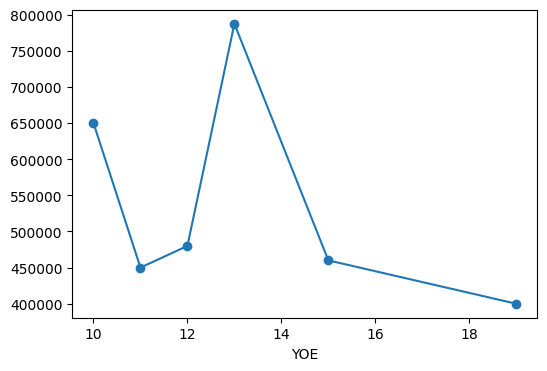

In [332]:
average_salary_by_year_n1 = n1.groupby('YOE')['ctc'].mean()

average_salary_by_year_n1.plot(kind='line', marker='o', figsize=(6, 4))

**For the role of Manual tester with increase in experience ctc decreased**

In [333]:
n2=data[data['job_position']=='Assistant System Engineer']

<Axes: xlabel='YOE'>

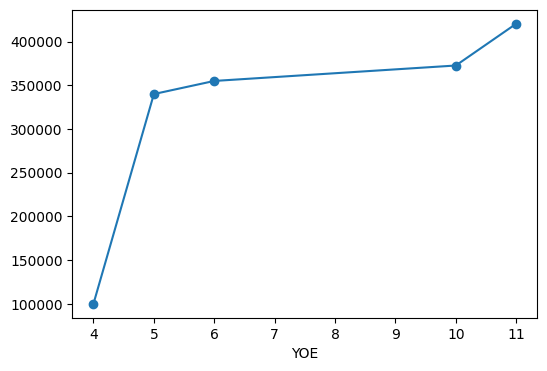

In [334]:
average_salary_by_year_n2 = n2.groupby('YOE')['ctc'].mean()

average_salary_by_year_n2.plot(kind='line', marker='o', figsize=(6, 4))

**For this role of Assistant System Engineer After 4 years of experience with increase in Experience ctc stayed almost constant**

**Years of Experience vs Ctc category**

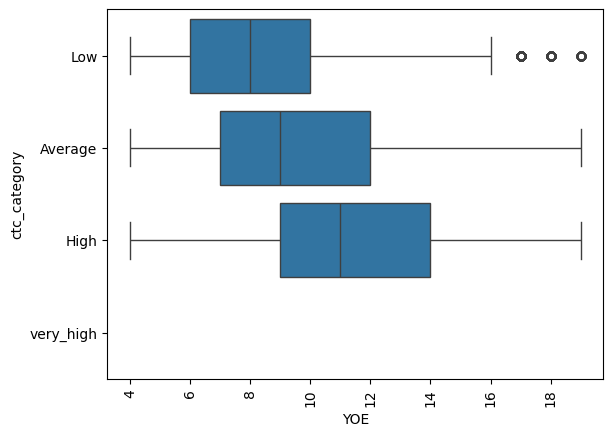

In [335]:
sns.boxplot(x='YOE', y='ctc_category', data=data)
plt.xticks(rotation=90)
plt.show()

**Learners wth average years of experience of 7 fall under Low Income Group**

**Learners wth average years of experience of 8 fall under Low Average Income Group**

**Learners wth average years of experience of 10 fall under High Income Group**

**Top 20 company hash with max ctc**

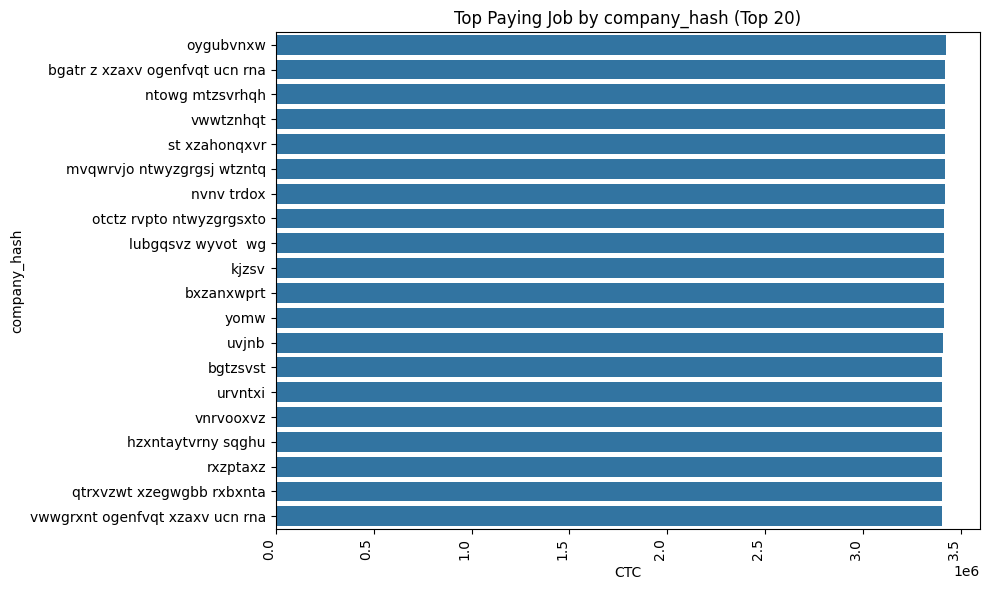

In [336]:
top_jobs = data.sort_values('ctc', ascending=False).groupby('company_hash_cleaned').head(1)
top_20_company_hash = top_jobs.groupby('company_hash_cleaned').first().sort_values('ctc', ascending=False).head(20).reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_company_hash,y=top_20_company_hash['company_hash_cleaned'],x=top_20_company_hash['ctc'])
plt.ylabel('company_hash')
plt.xlabel('CTC')
plt.title('Top Paying Job by company_hash (Top 20)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Top 20 job_position with max ctc**

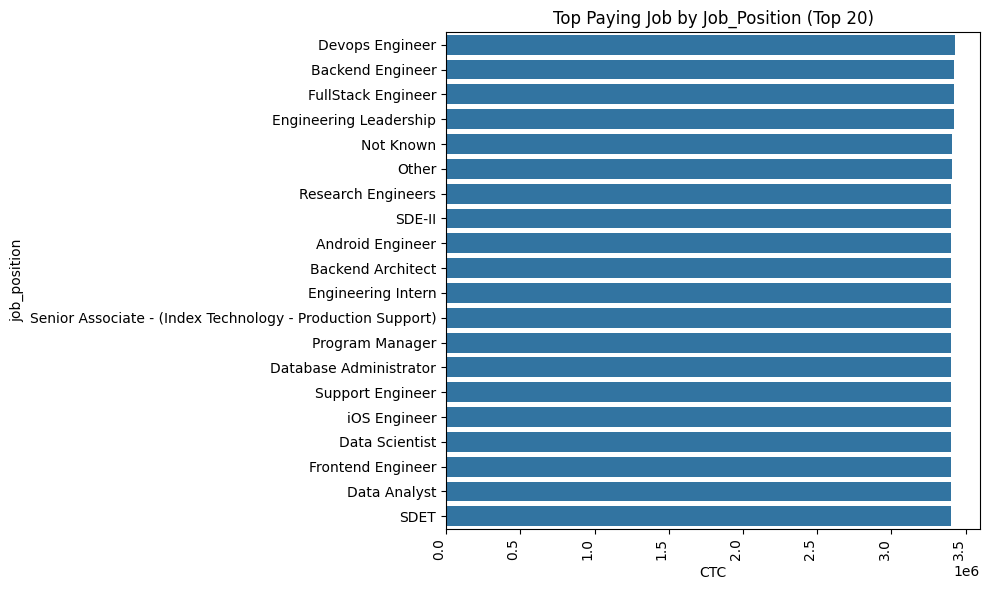

In [337]:
top_jobs2 = data.sort_values('ctc', ascending=False).groupby('job_position').head(1)
top_20_jobs = top_jobs2.groupby('job_position').first().sort_values('ctc', ascending=False).head(20).reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=top_20_jobs,y=top_20_jobs['job_position'],x=top_20_jobs['ctc'])
plt.ylabel('job_position')
plt.xlabel('CTC')
plt.title('Top Paying Job by Job_Position (Top 20)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### Manual Clustering

**on the basis of learner’s company, job position and years of experience**

**Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience**

In [338]:
summary5 = data.groupby(['company_hash_cleaned', 'job_position', 'YOE'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [339]:
summary5.head()

,company_hash_cleaned,job_position,YOE,mean,median,max,min,count
0,0,Not Known,5,100000.0,100000.0,100000.0,100000.0,1
1,0000,Other,8,300000.0,300000.0,300000.0,300000.0,1
2,01 ojztqsj,Android Engineer,9,270000.0,270000.0,270000.0,270000.0,1
3,01 ojztqsj,Frontend Engineer,14,830000.0,830000.0,830000.0,830000.0,1
4,05mz exzytvrny uqxcvnt rxbxnta,Not Known,6,1100000.0,1100000.0,1100000.0,1100000.0,1


**Merging the same with original dataset carefully and creating some flags showing learners with CTC greater than the Average of their Company’s department having same Years of Experience - Call that flag designation with values [1,2,3]**

In [340]:
merged_data = pd.merge(data, summary5, on=['company_hash_cleaned', 'job_position', 'YOE'], how='left')
unknown_class = 'unavailable'
merged_data['designation'] = np.where(merged_data['ctc']>merged_data['mean'],1,
               np.where(merged_data['ctc']==merged_data['mean'],2,
               np.where(merged_data['ctc']<merged_data['mean'],3, unknown_class)))

In [341]:
merged_data.head()

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,designation
0,2016,1100000.0,2020,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666,10,1.100000e+06,1100000.0,1100000.0,1100000.0,1,2
1,2018,449999.0,2019,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074,9,7.033332e+05,685000.0,950000.0,449999.0,6,3
2,2015,2000000.0,2020,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000,10,2.000000e+06,2000000.0,2000000.0,2000000.0,1,2
3,2017,700000.0,2019,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900,9,1.100000e+06,850000.0,1750000.0,700000.0,3,3
4,2017,1400000.0,2019,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000,9,1.400000e+06,1400000.0,1400000.0,1400000.0,1,2


**Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company and Job Position. Name that flag Class with values [1,2,3]**

In [342]:
summary5_2 = data.groupby(['company_hash_cleaned', 'job_position'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [343]:
merged_data2 = pd.merge(data, summary5_2, on=['company_hash_cleaned', 'job_position'], how='left')

In [344]:
unknown_class = 'unavailable'
merged_data2['class'] = np.where(merged_data2['ctc']>merged_data2['mean'],1,
               np.where(merged_data2['ctc']==merged_data2['mean'],2,
               np.where(merged_data2['ctc']<merged_data2['mean'],3, unknown_class)))

In [345]:
merged_data2.head()

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,class
0,2016,1100000.0,2020,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666,10,1.085000e+06,1085000.0,1100000.0,1070000.0,2,1
1,2018,449999.0,2019,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074,9,9.013888e+05,685000.0,2000000.0,300000.0,18,3
2,2015,2000000.0,2020,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000,10,2.000000e+06,2000000.0,2000000.0,2000000.0,1,2
3,2017,700000.0,2019,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900,9,1.458333e+06,1675000.0,2600000.0,520000.0,18,3
4,2017,1400000.0,2019,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000,9,8.466667e+05,600000.0,1400000.0,540000.0,3,1


**Getting the 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company . Name that flag Tier with values [1,2,3]**

In [346]:
summary5_3 = data.groupby(['company_hash_cleaned'])['ctc'].agg(['mean', 'median', 'max', 'min', 'count']).reset_index()

In [347]:
merged_data3= pd.merge(data, summary5_3, on=['company_hash_cleaned'], how='left')

In [348]:
unknown_class = 'unavailable'
merged_data3['Tier'] = np.where(merged_data3['ctc']>merged_data3['mean'],1,
               np.where(merged_data3['ctc']==merged_data3['mean'],2,
               np.where(merged_data3['ctc']<merged_data3['mean'],3, unknown_class)))

In [349]:
merged_data3.head()

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,Tier
0,2016,1100000.0,2020,Other,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666,10,1.115667e+06,1070000.0,1771000.0,500000.0,9,3
1,2018,449999.0,2019,FullStack Engineer,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074,9,1.038554e+06,845000.0,3400000.0,10000.0,312,3
2,2015,2000000.0,2020,Backend Engineer,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000,10,2.000000e+06,2000000.0,2000000.0,2000000.0,1,2
3,2017,700000.0,2019,Backend Engineer,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900,9,1.519043e+06,1350000.0,3400000.0,200000.0,47,3
4,2017,1400000.0,2019,FullStack Engineer,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000,9,8.480000e+05,700000.0,1400000.0,540000.0,5,1


##### Based on the manual clustering done so far we can now answer questions like
**1.Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [350]:
merged_data3[merged_data3['Tier']=='1'].sort_values('ctc',ascending=False).head(10)

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,Tier
45298,2007,3425000.0,2019,Devops Engineer,oygubvnxw,19a14490bf2ea3c0cbaa4b1d74e5392a5de083f80f9ba2...,18,0,High,2715833,12,2.489000e+06,2400000.0,3425000.0,1920000.0,5,1
17020,2017,3420000.0,2020,Backend Engineer,nvnv trdox,f29cbd0f9e98f154a32ebe5fa74297a2439269fea2bbe5...,8,0,High,3382358,9,7.565081e+05,645000.0,3420000.0,6600.0,74,1
32170,2018,3420000.0,2020,FullStack Engineer,vwwtznhqt,ae7a452206d4a2639ac928e17b6707a3e31d63695e075a...,7,0,High,2699619,8,7.283025e+05,600000.0,3420000.0,1000.0,1872,1
124128,2006,3420000.0,2019,Engineering Leadership,bgatr z xzaxv ogenfvqt ucn rna,18a99b8a30f9d2ff5a91dd974ee02af55f60cd41b4acc7...,19,0,High,2085000,14,2.085000e+06,2085000.0,3420000.0,750000.0,2,1
28598,2012,3420000.0,2019,Engineering Leadership,st xzahonqxvr,0a40ebc1dd7f2405cd75937882b03346f6f91c3bdca45a...,13,0,High,3410000,14,3.410000e+06,3410000.0,3420000.0,3400000.0,2,1
106210,2012,3420000.0,2019,Backend Engineer,ntowg mtzsvrhqh,69b9559e8e611e019eb457221e074ace0348304fdb9ea1...,13,0,High,2180571,11,1.700478e+06,1655000.0,3420000.0,330000.0,46,1
85418,2011,3414786.0,2019,FullStack Engineer,otctz rvpto ntwyzgrgsxto,c4e75608fa72b90929debbf400ee53810ffde898728ff2...,14,0,High,2121778,11,1.664723e+06,1390000.0,3414786.0,13000.0,8,1
91601,2018,3410000.0,2021,Other,yomw,c46666a94567e7be522d96925aff17a5b9a83e86505de5...,7,0,High,3294070,9,1.147722e+06,1000000.0,3410000.0,125000.0,144,1
126996,2018,3410000.0,2019,Other,lubgqsvz wyvot wg,c46067f223118cfec010c64b6907e35ff3631295402057...,7,0,High,2745074,12,1.715057e+06,1650000.0,3410000.0,12000.0,697,1
52764,2014,3410000.0,2019,Not Known,bxzanxwprt,b2c37ea6f7cb65342c844226a242eae0750bd7a0b59f5f...,11,0,High,2431440,9,2.006064e+06,2100000.0,3410000.0,200000.0,47,1


**Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1**

In [351]:
merged_data2[merged_data2['class']=='1'].sort_values('ctc',ascending=False).head(10)

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,class
17020,2017,3420000.0,2020,Backend Engineer,nvnv trdox,f29cbd0f9e98f154a32ebe5fa74297a2439269fea2bbe5...,8,0,High,3382358,9,9.855556e+05,600000.0,3420000.0,400000.0,9,1
106210,2012,3420000.0,2019,Backend Engineer,ntowg mtzsvrhqh,69b9559e8e611e019eb457221e074ace0348304fdb9ea1...,13,0,High,2180571,11,1.727941e+06,1750000.0,3420000.0,465000.0,17,1
32170,2018,3420000.0,2020,FullStack Engineer,vwwtznhqt,ae7a452206d4a2639ac928e17b6707a3e31d63695e075a...,7,0,High,2699619,8,7.383966e+05,650000.0,3420000.0,3000.0,179,1
85418,2011,3414786.0,2019,FullStack Engineer,otctz rvpto ntwyzgrgsxto,c4e75608fa72b90929debbf400ee53810ffde898728ff2...,14,0,High,2121778,11,2.024929e+06,1400000.0,3414786.0,1260000.0,3,1
126996,2018,3410000.0,2019,Other,lubgqsvz wyvot wg,c46067f223118cfec010c64b6907e35ff3631295402057...,7,0,High,2745074,12,1.894111e+06,1700000.0,3410000.0,80000.0,45,1
116616,2016,3410000.0,2020,FullStack Engineer,kjzsv,b5a59afa3147962e955f32f886a5887b2d6e2a2ca801cb...,9,0,High,2208863,10,2.084545e+06,2100000.0,3410000.0,1100000.0,11,1
91601,2018,3410000.0,2021,Other,yomw,c46666a94567e7be522d96925aff17a5b9a83e86505de5...,7,0,High,3294070,9,8.388462e+05,660000.0,3410000.0,125000.0,13,1
52764,2014,3410000.0,2019,Not Known,bxzanxwprt,b2c37ea6f7cb65342c844226a242eae0750bd7a0b59f5f...,11,0,High,2431440,9,2.140769e+06,2300000.0,3410000.0,700000.0,13,1
44280,2013,3409000.0,2017,Backend Engineer,uvjnb,bd3e47dc20cfc035f08f1b8fe808a431b0dff8b4be5cd7...,12,0,High,1982753,10,1.575849e+06,1500000.0,3409000.0,5000.0,352,1
82966,2007,3400000.0,2017,Engineering Leadership,st ytvrnywvqt,4920d33fa7cb0d90e7fbce4fd61aae53d2e369238456e1...,18,0,High,3783496,14,2.508750e+06,2555000.0,3400000.0,1500000.0,8,1


**Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 3**

In [352]:
merged_data2[(merged_data2['class']=='3') & (merged_data2['job_position']=='Data Scientist')].sort_values('ctc',ascending=True).head(10)

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,class
8977,2017,4000.0,2019,Data Scientist,srgmvrtast xzntrrxstzwt ge nyxzso,8001bc017fbe95541d23f5780c3edb988b7d9b2225e39e...,8,0,Low,623291,9,2.120000e+05,212000.0,420000.0,4000.0,2,3
36100,2019,6000.0,2021,Data Scientist,onhatzn,bd9c04a574090e05b366a81cdb2f3f565d0c60fa8b1647...,6,0,Low,4076075,6,1.290083e+06,1000000.0,3000000.0,6000.0,12,3
7860,2020,7500.0,2020,Data Scientist,nvnv wgzohrnvzwj otqcxwto,3175d03fd4618eb293d6f5a1d13d42a0c79f68e9acaaa3...,5,0,Low,2094451,7,7.467231e+05,600000.0,3200000.0,7500.0,69,3
18123,2015,8800.0,2019,Data Scientist,vqxosrgmvr,3675f79c7e05de96ccf189c818b84b487cb1aa3f6b80e8...,10,0,Low,727971,9,5.529000e+05,552900.0,1097000.0,8800.0,2,3
107833,2018,10000.0,2019,Data Scientist,ytfrtnn uvwpvqa tzntquqxot,8274b3188470cd1c4914e7face490111e27f239457e62d...,7,0,Low,2866531,12,1.423333e+06,1505000.0,2500000.0,10000.0,6,3
6829,2010,18000.0,2019,Data Scientist,grv vzx ntwyzgrgsxto ucn rna,c26de71bef1887f9d30e01e499422111cb6ffba2162838...,15,0,Low,2106392,11,1.628909e+06,1500000.0,3400000.0,18000.0,11,3
13426,2014,18000.0,2019,Data Scientist,hztburgjta,455bb6d1cbeae00c7844261cbe61ead8fa2c4dd73a8021...,11,0,Low,1378287,10,5.752500e+05,541500.0,1200000.0,18000.0,4,3
108323,2018,20000.0,2019,Data Scientist,nqtatzwt xzw,3e97cebf7372ac75eadf150adcb41d623e68d3b91caf86...,7,0,Low,968624,8,8.974998e+05,965000.0,1639999.0,20000.0,4,3
66043,2016,31000.0,2019,Data Scientist,ahzzyhbmj,d32c344816921ae7be310ba7630c6e267703b2fc4e6a6c...,9,0,Low,1330560,10,1.246963e+06,1200000.0,2000000.0,31000.0,27,3
37847,2016,46500.0,2017,Data Scientist,zvz,d277c90e2b97fb51657936b66b68eee2e52bd4d8d98e1d...,9,0,Low,2309917,7,1.151516e+06,815000.0,3200000.0,46500.0,32,3


**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [353]:
merged_data3[merged_data3['Tier']=='3'].sort_values('ctc',ascending=True).head(10)

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,mean,median,max,min,count,Tier
88857,2014,2.0,2019,Backend Engineer,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,11,0,Low,1399377,8,9.258576e+05,850000.0,3250000.0,2.0,49,3
78364,2013,6.0,2018,Not Known,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,12,0,Low,1399377,8,9.258576e+05,850000.0,3250000.0,2.0,49,3
75857,2013,14.0,2018,Not Known,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,12,0,Low,1399377,8,9.258576e+05,850000.0,3250000.0,2.0,49,3
117515,2016,15.0,2018,Not Known,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,9,0,Low,15,8,1.550000e+01,15.5,16.0,15.0,2,3
109607,2012,600.0,2017,Backend Engineer,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,13,0,Low,2094451,7,5.727571e+05,450000.0,3400000.0,600.0,5122,3
67503,2018,600.0,2021,FullStack Engineer,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,7,0,Low,2502795,7,1.452221e+06,1350000.0,3400000.0,600.0,333,3
97906,2019,600.0,2023,Not Known,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,6,1,Low,2309917,7,1.039212e+06,890000.0,3400000.0,600.0,1235,3
62866,2006,1000.0,2020,Product Manager,fvrbvqn,d05f25bba7fdf090af5afe8976025898cff9d9851bfed4...,19,0,Low,3624780,11,1.833486e+06,2000000.0,3240000.0,1000.0,105,3
87050,2015,1000.0,2015,Backend Engineer,uvsotshqg hgr,fc6c6989648ca9a8e78932e583b3f4e6f75a43e0e6c84a...,10,0,Low,42229,12,4.222950e+04,48959.0,70000.0,1000.0,4,3
52973,2019,1000.0,2021,Not Known,vwwtznhqt,f0f2005505c707dbdd2c86ca1587c26f822a004e86a8ec...,6,0,Low,2699619,8,7.283025e+05,600000.0,3420000.0,1000.0,1872,3


**Top 10 companies (based on their CTC)**

In [354]:
data_sorted = data.sort_values(by='ctc', ascending=False)
top_10_companies = data_sorted.groupby('company_hash_cleaned')['ctc'].mean().nlargest(10).reset_index()

In [355]:
top_10_companies

,company_hash_cleaned,ctc
0,mvqwrvjo ntwyzgrgsj wtzntq,3420000.0
1,st xzahonqxvr,3410000.0
2,ahurgwrgha,3400000.0
3,bgztj nvu ucn rna,3400000.0
4,bxwqgogen qa,3400000.0
5,lgzto rvzs rvovrrt lrr,3400000.0
6,mgqtvrxo vx,3400000.0
7,mxno sgv,3400000.0
8,outtartastq,3400000.0
9,ovbohzs atryx,3400000.0


**Top 2 positions in every company (based on their CTC)**

In [356]:
data_sorted = data.sort_values(by=['company_hash_cleaned', 'ctc'], ascending=False)
top_2_positions = data_sorted.groupby('company_hash_cleaned').head(2)
top_2_positions

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience
91112,2014,130000.0,2017,Not Known,zzgato,d421e52125f8057c65fa554752be03b056221c8590ff26...,11,0,Low,130000,11
58232,2017,600000.0,2021,FullStack Engineer,zzb ztdnstz vacxogqj ucn rna,ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...,8,0,Average,600000,8
4241,2013,1370000.0,2020,Other,zz,7d4588453bc463b39db8c77ef0f856957fc42f5d54cae4...,12,0,Average,935000,14
13563,2009,500000.0,2021,Not Known,zz,d6923a6f81c7b36615d9f14349fe01aec442029b2c502f...,16,0,Low,935000,14
45374,2012,940000.0,2019,Frontend Engineer,zyvzwt wgzohrnxzs tzsxzttqo,49df7e15dae1895709b1c5c3a58008243f914f7ca54186...,13,0,Average,940000,13
...,...,...,...,...,...,...,...,...,...,...,...
77249,2019,1100000.0,2021,Not Known,05mz exzytvrny uqxcvnt rxbxnta,4702229ffb6968c87b16fc57e730769e554184e322e111...,6,0,Average,1100000,6
45361,2011,830000.0,2019,Frontend Engineer,01 ojztqsj,e1e15fada844f35fcc33927343d0c80f55526b87c40eee...,14,0,Average,550000,11
59464,2016,270000.0,2019,Android Engineer,01 ojztqsj,819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...,9,0,Low,550000,11
147927,2017,300000.0,2020,Other,0000,b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...,8,0,Low,300000,8


**Question:Which companies dominate in Tier 1 and why might this be the case?**

In [357]:
temp=merged_data3[merged_data3['Tier']=='1']
temp['company_hash_cleaned'].value_counts()

company_hash_cleaned
nvnv wgzohrnvzwj otqcxwto        1953
xzegojo                          1239
vbvkgz                            989
wgszxkvzn                         828
zgn vuurxwvmrt vwwghzn            739
                                 ... 
xzntsqv bxwqg ojontbo ucn rna       1
ntwynqtt xn ojontbo ucn rna         1
ojontbvnxd xzegntwy ucn rna         1
ovqvr ogenntwy ucn rna              1
wxowg ojntbo                        1
Name: count, Length: 7409, dtype: int64

In [358]:
temp['company_hash_cleaned'].value_counts().index[0:10]

Index(['nvnv wgzohrnvzwj otqcxwto', 'xzegojo', 'vbvkgz', 'wgszxkvzn',
       'zgn vuurxwvmrt vwwghzn', 'vwwtznhqt', 'fxuqg rxbxnta', 'gqvwrt',
       'bxwqgogen', 'wvustbxzx'],
      dtype='object', name='company_hash_cleaned')

1. They provide better ctc <br>
2. Working conditions of the companies must be good <br>
3. They must be giving periodic salary increments <br>

#### Data processing for Unsupervised clustering

In [359]:
data['job_position'].nunique()

624

In [360]:
data['company_hash_cleaned'].nunique()

30676

**We will use Label Encoding to encide the column 'company_hash_cleaned' and 'job_position'**

In [361]:
data['company_hash']=data.groupby('company_hash_cleaned')['ctc'].transform('mean')
data['job_position']=data.groupby('job_position')['ctc'].transform('mean')

In [362]:
data

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,ctc_category,avg_ctc_per_comp,avg_experience,company_hash
0,2016,1100000.0,2020,8.230339e+05,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,Average,1115666,10,1.115667e+06
1,2018,449999.0,2019,1.041217e+06,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,Low,2478074,9,1.038554e+06
2,2015,2000000.0,2020,1.251687e+06,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,Average,2000000,10,2.000000e+06
3,2017,700000.0,2019,1.251687e+06,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,Average,1683900,9,1.519043e+06
4,2017,1400000.0,2019,1.041217e+06,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,Average,848000,9,8.480000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
153437,2013,2280000.0,2019,1.020806e+06,xgz,b8632b290be3b4b50c5ae979f3bf9a79ac805d172b1459...,12,0,High,1949830,11,1.809395e+06
153438,2011,2250000.0,2019,1.020806e+06,mvqwrvjo,53442a1663ccfdbd473055fee4e4ac9f4bb398dc446242...,14,0,High,4220281,12,1.270317e+06
153439,2017,500000.0,2020,1.020806e+06,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,8,0,Low,2226555,8,1.217952e+06
153440,2021,700000.0,2021,1.020806e+06,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,4,0,Average,1444735,10,1.368267e+06


**Using One Hot Encoding for ctc category**

In [363]:
data = pd.get_dummies(data, columns=['ctc_category'])

In [364]:
data

,orgyear,ctc,ctc_updated_year,job_position,company_hash_cleaned,email_hash_cleaned,YOE,recent_promotion,avg_ctc_per_comp,avg_experience,company_hash,ctc_category_Low,ctc_category_Average,ctc_category_High,ctc_category_very_high
0,2016,1100000.0,2020,8.230339e+05,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,9,0,1115666,10,1.115667e+06,False,True,False,False
1,2018,449999.0,2019,1.041217e+06,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,7,0,2478074,9,1.038554e+06,True,False,False,False
2,2015,2000000.0,2020,1.251687e+06,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,10,0,2000000,10,2.000000e+06,False,True,False,False
3,2017,700000.0,2019,1.251687e+06,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,8,0,1683900,9,1.519043e+06,False,True,False,False
4,2017,1400000.0,2019,1.041217e+06,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,8,0,848000,9,8.480000e+05,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153437,2013,2280000.0,2019,1.020806e+06,xgz,b8632b290be3b4b50c5ae979f3bf9a79ac805d172b1459...,12,0,1949830,11,1.809395e+06,False,False,True,False
153438,2011,2250000.0,2019,1.020806e+06,mvqwrvjo,53442a1663ccfdbd473055fee4e4ac9f4bb398dc446242...,14,0,4220281,12,1.270317e+06,False,False,True,False
153439,2017,500000.0,2020,1.020806e+06,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,8,0,2226555,8,1.217952e+06,True,False,False,False
153440,2021,700000.0,2021,1.020806e+06,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,4,0,1444735,10,1.368267e+06,False,True,False,False


**Removing Unneccessary columns** <br>
company_hash_cleaned,email_hash_cleaned <br>
also column avg_ctc_per_comp and company_hash are duplicate columns do drop avg_ctc_per_comp

In [365]:
data.drop(['company_hash_cleaned','email_hash_cleaned','avg_ctc_per_comp'], axis=1,inplace=True)

In [366]:
data.head()

,orgyear,ctc,ctc_updated_year,job_position,YOE,recent_promotion,avg_experience,company_hash,ctc_category_Low,ctc_category_Average,ctc_category_High,ctc_category_very_high
0,2016,1100000.0,2020,8.230339e+05,9,0,10,1.115667e+06,False,True,False,False
1,2018,449999.0,2019,1.041217e+06,7,0,9,1.038554e+06,True,False,False,False
2,2015,2000000.0,2020,1.251687e+06,10,0,10,2.000000e+06,False,True,False,False
3,2017,700000.0,2019,1.251687e+06,8,0,9,1.519043e+06,False,True,False,False
4,2017,1400000.0,2019,1.041217e+06,8,0,9,8.480000e+05,False,True,False,False


In [367]:
data.reset_index()

,index,orgyear,ctc,ctc_updated_year,job_position,YOE,recent_promotion,avg_experience,company_hash,ctc_category_Low,ctc_category_Average,ctc_category_High,ctc_category_very_high
0,0,2016,1100000.0,2020,8.230339e+05,9,0,10,1.115667e+06,False,True,False,False
1,1,2018,449999.0,2019,1.041217e+06,7,0,9,1.038554e+06,True,False,False,False
2,2,2015,2000000.0,2020,1.251687e+06,10,0,10,2.000000e+06,False,True,False,False
3,3,2017,700000.0,2019,1.251687e+06,8,0,9,1.519043e+06,False,True,False,False
4,4,2017,1400000.0,2019,1.041217e+06,8,0,9,8.480000e+05,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129156,153437,2013,2280000.0,2019,1.020806e+06,12,0,11,1.809395e+06,False,False,True,False
129157,153438,2011,2250000.0,2019,1.020806e+06,14,0,12,1.270317e+06,False,False,True,False
129158,153439,2017,500000.0,2020,1.020806e+06,8,0,8,1.217952e+06,True,False,False,False
129159,153440,2021,700000.0,2021,1.020806e+06,4,0,10,1.368267e+06,False,True,False,False


**Standardization of Data**

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
X=scaler.transform(data)

In [369]:
scaled_data=pd.DataFrame(X,columns=data.columns)

In [370]:
data['ctc_category_very_high'].nunique()

1

In [371]:
scaled_data.drop(['ctc_category_very_high'],axis=1,inplace=True)

In [372]:
scaled_data

,orgyear,ctc,ctc_updated_year,job_position,YOE,recent_promotion,avg_experience,company_hash,ctc_category_Low,ctc_category_Average,ctc_category_High
0,0.152521,0.044278,0.337116,-1.246368,-0.152521,-0.033292,0.259576,0.095877,-0.584070,0.762523,-0.357460
1,0.792830,-0.848125,-0.413495,-0.135130,-0.792830,-0.033292,-0.227411,-0.058416,1.712122,-1.311437,-0.357460
2,-0.167634,1.279911,0.337116,0.936820,0.167634,-0.033292,0.259576,1.865310,-0.584070,0.762523,-0.357460
3,0.472675,-0.504892,-0.413495,0.936820,-0.472675,-0.033292,-0.227411,0.902978,-0.584070,0.762523,-0.357460
4,0.472675,0.456156,-0.413495,-0.135130,-0.472675,-0.033292,-0.227411,-0.439689,-0.584070,0.762523,-0.357460
...,...,...,...,...,...,...,...,...,...,...,...
129156,-0.807943,1.664330,-0.413495,-0.239087,0.807943,-0.033292,0.746563,1.483934,-0.584070,-1.311437,2.797515
129157,-1.448252,1.623142,-0.413495,-0.239087,1.448252,-0.033292,1.233551,0.405312,-0.584070,-1.311437,2.797515
129158,0.472675,-0.779477,0.337116,-0.239087,-0.472675,-0.033292,-0.714398,0.300536,1.712122,-1.311437,-0.357460
129159,1.753294,-0.504892,1.087727,-0.239087,-1.753294,-0.033292,0.259576,0.601296,-0.584070,0.762523,-0.357460


**Checking Clustering Tendency**

In [373]:
from sklearn.neighbors import NearestNeighbors
def hopkins_statistic(X, n):
    # Number of samples
    m = len(X)
    
    # Initialize nearest neighbor distances
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    rand_X = np.random.rand(n, X.shape[1])
    rand_X = np.vstack([X, rand_X])
    rand_nbrs = NearestNeighbors(n_neighbors=1).fit(rand_X)
    
    # Calculate Hopkins statistic
    u, _ = nbrs.kneighbors(rand_X, return_distance=True)
    w, _ = rand_nbrs.kneighbors(rand_X, return_distance=True)
    return np.sum(u) / (np.sum(u) + np.sum(w))

# Example usage
X = data  # Your dataset
hopkins_value = hopkins_statistic(X, 1000)
print("Hopkins Statistic:", hopkins_value)

Hopkins Statistic: 1.0


Since Hopkins Statistics is 1.0 there is good potential for clusterng.

##### Elbow method

In [374]:
from sklearn.cluster import KMeans
wcss = []

# Fit k-means clustering for different values of k
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(scaled_data)
    # Append WCSS to list
    wcss.append(kmeans.inertia_)

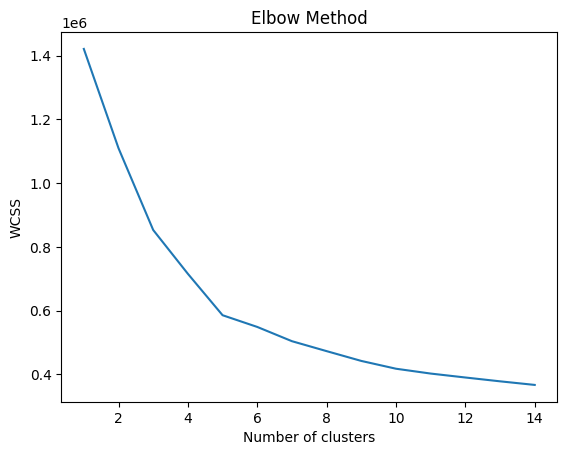

In [375]:
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

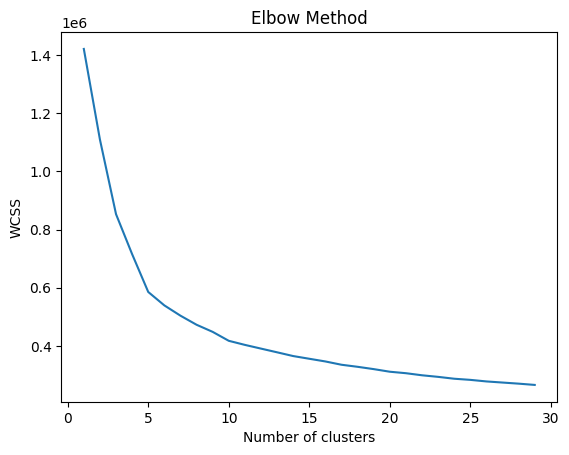

In [376]:
wcss = []

# Fit k-means clustering for different values of k
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(scaled_data)
    # Append WCSS to list
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**According to the elbow method 6 centroids seem like optimal number of clusters**

In [377]:
kmeans=KMeans(n_clusters=6, random_state=42)
y=kmeans.fit_predict(scaled_data)

In [378]:
y

array([1, 0, 1, ..., 0, 2, 4])

In [379]:
np.unique(y)

array([0, 1, 2, 3, 4, 5])

In [380]:
karr=kmeans.labels_
len(set(karr))

6

In [381]:
kdata=data.copy()
kdata['labels']=kmeans.labels_
kdata.head(5)

,orgyear,ctc,ctc_updated_year,job_position,YOE,recent_promotion,avg_experience,company_hash,ctc_category_Low,ctc_category_Average,ctc_category_High,ctc_category_very_high,labels
0,2016,1100000.0,2020,8.230339e+05,9,0,10,1.115667e+06,False,True,False,False,1
1,2018,449999.0,2019,1.041217e+06,7,0,9,1.038554e+06,True,False,False,False,0
2,2015,2000000.0,2020,1.251687e+06,10,0,10,2.000000e+06,False,True,False,False,1
3,2017,700000.0,2019,1.251687e+06,8,0,9,1.519043e+06,False,True,False,False,1
4,2017,1400000.0,2019,1.041217e+06,8,0,9,8.480000e+05,False,True,False,False,1


##### CLUSTERS Characteristics According to Kmeans

In [382]:
hcols=['orgyear','ctc_updated_year','YOE','ctc_category_Low','ctc_category_Average','ctc_category_High']

In [383]:
l0=kdata[kdata['labels']==0]

In [384]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(l0[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2019    0.186865
2018    0.168381
2017    0.158253
2016    0.134958
2020    0.098592
2015    0.094857
2014    0.060737
2013    0.034499
2021    0.026966
2012    0.021966
2011    0.008957
2010    0.003355
2009    0.001076
2008    0.000443
2007    0.000095
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2021    0.379617
2020    0.264567
2019    0.212439
2017    0.054534
2018    0.049058
2016    0.025669
2015    0.007026
2022    0.006552
2024    0.000348
2025    0.000190
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
6     0.186865
7     0.168381
8     0.158253
9     0.134958
5     0.098592
10    0.094857
11    0.060737
12    0.034499
4     0.026966
13    0.021966
14    0.008957
15    0.003355
16    0.001076
17    0.000443
18    0.000095
Name: proportion, dtype: float64

In [385]:
l0['ctc'].min()

2.0

In [386]:
l0['ctc'].max()

500000.0

##### Cluster 0
Majority off Learners belonging to Low Income Category  <br>
Learners of this cluster have experience between 4 to 18 years <br>
Learners of this cluster have joined their company from 2007 to 2021 <br>
Learners if this cluster have had salary_increment between 2015 to 2025 <br>
Majority of learners earn between 2 to 500000 <br>

In [387]:
l1=kdata[kdata['labels']==1]

In [388]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(l1[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2015    0.276585
2016    0.213105
2014    0.212821
2017    0.112995
2013    0.086858
2018    0.052217
2012    0.023435
2019    0.015585
2011    0.005802
2020    0.000455
2010    0.000085
2021    0.000057
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2019    0.460994
2020    0.226984
2021    0.186826
2018    0.052900
2017    0.045988
2016    0.022696
2015    0.003612
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
10    0.276585
9     0.213105
11    0.212821
8     0.112995
12    0.086858
7     0.052217
13    0.023435
6     0.015585
14    0.005802
5     0.000455
15    0.000085
4     0.000057
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Low 

ctc_category_Low
False    1.0
Name: proportion, dt

In [389]:
l1['ctc'].min()

501000.0

In [390]:
l1['ctc'].max()

2000000.0

##### Cluster 1
It consists of Learners belonging to Average Income Category <br>
Learners of this cluster have experience between 4 to 15 years <br>
Learners of this cluster have joined their company from 2010 to 2021 <br>
Learners if this cluster have had salary_increment between 2015 to 2021 <br>
Majority of learners earn between 501000 to 2000000 <br> 

In [391]:
l2=kdata[kdata['labels']==2]

In [392]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(l2[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2019    0.285908
2018    0.234325
2017    0.179131
2020    0.132766
2016    0.096447
2021    0.034389
2015    0.031958
2014    0.004933
2013    0.000143
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2021    0.414599
2020    0.373633
2019    0.185851
2018    0.013548
2022    0.010903
2017    0.001144
2024    0.000322
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
6     0.285908
7     0.234325
8     0.179131
5     0.132766
9     0.096447
4     0.034389
10    0.031958
11    0.004933
12    0.000143
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Low 

ctc_category_Low
False    1.0
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_ca

In [393]:
l2['ctc'].min()

501999.0

In [394]:
l2['ctc'].max()

2400000.0

##### Cluster 2
It consists of Learners belonging to Average and High Income Category <br>
Learners of this cluster have experience between 4 to 12 years <br>
Learners of this cluster have joined their company from 2013 to 2021 <br>
Learners if this cluster have had salary_increment between 2017 to 2024 <br>
Majority of learners earn between 501999 to 2400000

In [395]:
l3=kdata[kdata['labels']==3]

In [396]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(l3[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2015    0.106088
2016    0.099316
2014    0.093707
2012    0.090150
2013    0.088030
2017    0.080917
2011    0.076607
2018    0.069767
2010    0.068194
2019    0.066279
2009    0.037756
2008    0.030848
2006    0.030643
2007    0.029412
2020    0.025103
2021    0.007182
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2019    0.370246
2020    0.246512
2021    0.213953
2018    0.060123
2017    0.044049
2016    0.043502
2015    0.017579
2022    0.004036
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
10    0.106088
9     0.099316
11    0.093707
13    0.090150
12    0.088030
8     0.080917
14    0.076607
7     0.069767
15    0.068194
6     0.066279
16    0.037756
17    0.030848
19    0.030643
18    0.029412
5     0.025103
4     0.007182
Name: proportion, dtype: float64



In [397]:
l3['ctc'].min()

2001200.0

In [398]:
l3['ctc'].max()

3425000.0

##### Cluster 3
It consists of Learners belonging to High Income Category <br>
Learners of this cluster have experience between 4 to 19 years <br>
Learners of this cluster have joined their company from 2006 to 2021 <br>
Learners if this cluster have had salary_increment between 2015 to 2022 <br>
Majority of learners earn between 2001200 to 3425000

In [399]:
l4=kdata[kdata['labels']==4]

In [400]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(l4[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2012    0.240340
2011    0.202410
2013    0.177954
2010    0.147651
2009    0.067114
2014    0.051149
2008    0.044489
2007    0.032896
2006    0.025473
2015    0.010372
2016    0.000153
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2019    0.507576
2021    0.128178
2017    0.096146
2016    0.088011
2020    0.075249
2018    0.073165
2015    0.031676
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
13    0.240340
14    0.202410
12    0.177954
15    0.147651
16    0.067114
11    0.051149
17    0.044489
18    0.032896
19    0.025473
10    0.010372
9     0.000153
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Low 

ctc_category_Low
False    0.939191
True     0.060809
Name: proportion, dtype: floa

In [401]:
l4['ctc'].min()

1000.0

In [402]:
l4['ctc'].max()

2000000.0

##### Cluster 4
It consists of Learners belonging majorly belonging to  Average Income Category and a few from low income category.<br>
Learners of this cluster have experience between 9 to 19 years <br>
Learners of this cluster have joined their company from 2006 to 2016 <br>
Learners if this cluster have had salary_increment between 2015 to 2021 <br>
Majority of learners earn between 1000 to 2000000

In [403]:
l5=kdata[kdata['labels']==5]

In [404]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(l5[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2021    0.664336
2020    0.300699
2019    0.027972
2018    0.006993
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2023    1.0
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
4    0.664336
5    0.300699
6    0.027972
7    0.006993
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Low 

ctc_category_Low
False    0.559441
True     0.440559
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Average 

ctc_category_Average
False    0.503497
True     0.496503
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_High 

ctc_category_High
False    0.937063
True    

In [405]:
l5['ctc'].min()

600.0

In [406]:
l5['ctc'].max()

3400000.0

##### Cluster 5
Majority off Learners belonging to Low and Average Income Category and some from High income Category <br>
Learners of this cluster have experience between 4 to 7 years <br>
Learners of this cluster have joined their company from 2018 to 2021 <br>
Learners if this cluster have had salary_increment in 2023 <br>
Majority of learners earn between 600 to 3400000

**Question: What percentage of users fall into the largest cluster?**

In [407]:
total=data.shape[0]
large=[
    
    {'Clusters':[0,1,2,3,4,5],
    'size':[l0.shape[0]/total,l1.shape[0]/total,l2.shape[0]/total,l3.shape[0]/total,l4.shape[0]/total,l5.shape[0]/total]}
]

In [408]:
large

[{'Clusters': [0, 1, 2, 3, 4, 5],
  'size': [0.24461718320545675,
   0.2722261363724344,
   0.21658240490550554,
   0.11319206261952137,
   0.15227506755135065,
   0.0011071453457312966]}]

Largest Percentage of users are present in cluster 1 ie 27% of learners.

.

**Question:Comment on the characteristics that differentiate the primary clusters from each other**

The most common characteristics that differentiate the primary clusters are ctc range, income group, and salary_increment year

##### Heirarchical Clustering

In [409]:
import scipy.cluster.hierarchy as sch

**We work with a small subset of data for heirarchical Clustering due to memory shortage**

In [410]:
subset_data=scaled_data[0:5000]

Text(0, 0.5, 'distance')

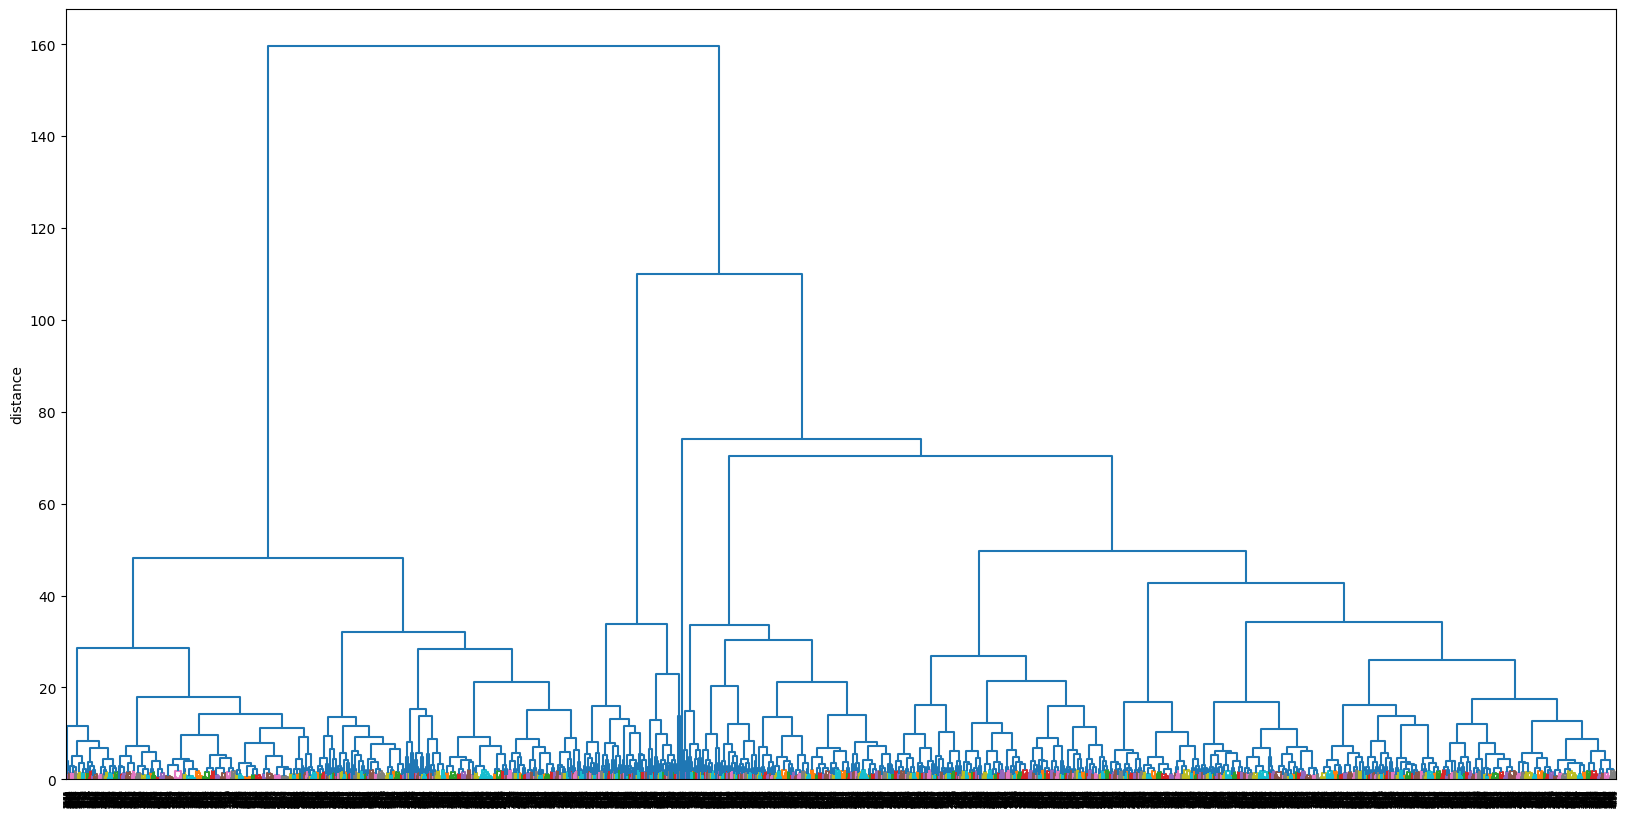

In [411]:
fig,ax=plt.subplots(figsize=(20,10))
sch.dendrogram(sch.linkage(subset_data,method='ward'),labels=subset_data.index,ax=ax,color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

**According to the dendogram we may have 5 clusters if we cut at distance 60**

In [412]:
from sklearn.cluster import AgglomerativeClustering


In [413]:
hmodel=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage= 'ward')
y_pred=hmodel.fit_predict(subset_data)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [436]:
np.unique(y_pred)

array([0, 1, 2, 3, 4], dtype=int64)

In [414]:
len(set(hmodel.labels_))

5

In [415]:
hdata=data[0:5000]
hdata['labels']=hmodel.labels_
hdata.head(5)

,orgyear,ctc,ctc_updated_year,job_position,YOE,recent_promotion,avg_experience,company_hash,ctc_category_Low,ctc_category_Average,ctc_category_High,ctc_category_very_high,labels
0,2016,1100000.0,2020,8.230339e+05,9,0,10,1.115667e+06,False,True,False,False,0
1,2018,449999.0,2019,1.041217e+06,7,0,9,1.038554e+06,True,False,False,False,1
2,2015,2000000.0,2020,1.251687e+06,10,0,10,2.000000e+06,False,True,False,False,0
3,2017,700000.0,2019,1.251687e+06,8,0,9,1.519043e+06,False,True,False,False,0
4,2017,1400000.0,2019,1.041217e+06,8,0,9,8.480000e+05,False,True,False,False,0


##### Clusters based on Heiraechical Clustering on subset of Data

##### Cluster 0

In [416]:
h0=hdata[hdata['labels']==0]

In [417]:
hcols=['orgyear','ctc_updated_year','YOE','ctc_category_Low','ctc_category_Average','ctc_category_High']
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(h0[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2018    0.187097
2016    0.186237
2019    0.167742
2017    0.160000
2015    0.107527
2020    0.095484
2014    0.051613
2013    0.026237
2012    0.009032
2021    0.008172
2011    0.000860
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2020    0.576344
2021    0.312688
2019    0.106667
2022    0.002581
2024    0.000860
2016    0.000430
2017    0.000430
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
7     0.187097
9     0.186237
6     0.167742
8     0.160000
10    0.107527
5     0.095484
11    0.051613
12    0.026237
13    0.009032
4     0.008172
14    0.000860
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Low 

ctc_category_Low
False    1.0
Name: proportion, dtype: float64

__________________

In [418]:
h0['ctc'].min()

509999.0

In [419]:
h0['ctc'].max()

2000000.0

<b>Majority off Learners belong to Average income Category <br>
Learners of this cluster have experience between 4 to 14 years <br>
Learners of this cluster have joined their company from 2011 to 2021 <br>
Learners if this cluster have had salary_increment between 2016 to 2024 <br>
Majority of learners earn between 509999 to 2000000 </b>

##### Cluster 1

In [420]:
h1=hdata[hdata['labels']==1]

In [421]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(h1[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2018    0.208633
2019    0.206235
2017    0.161871
2020    0.121103
2016    0.119904
2015    0.069544
2014    0.038969
2013    0.021583
2021    0.020384
2012    0.012590
2011    0.007794
2010    0.004796
2009    0.002998
2007    0.001799
2008    0.001199
2006    0.000600
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2020    0.461031
2021    0.421463
2019    0.108513
2022    0.007794
2017    0.000600
2024    0.000600
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
7     0.208633
6     0.206235
8     0.161871
5     0.121103
9     0.119904
10    0.069544
11    0.038969
12    0.021583
4     0.020384
13    0.012590
14    0.007794
15    0.004796
16    0.002998
18    0.001799
17    0.001199
19    0.000600
Name: proportion, dtype: float64

__________________________________

In [422]:
h1['ctc'].min()

1000.0

In [423]:
h1['ctc'].max()

500000.0

<b> Majority off Learners belong to Low income Category <br>
Learners of this cluster have experience between 4 to 19 years <br>
Learners of this cluster have joined their company from 2006 to 2021 <br>
Learners if this cluster have had salary_increment between 2017 to 2024 <br>
Majority of learners earn between 1000 to 500000 </b>

##### Cluster 2

In [424]:
h2=hdata[hdata['labels']==2]

In [425]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(h2[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2017    0.115625
2014    0.100000
2019    0.096875
2015    0.096875
2018    0.096875
2016    0.096875
2011    0.087500
2012    0.071875
2020    0.065625
2013    0.050000
2009    0.037500
2010    0.034375
2008    0.018750
2007    0.015625
2006    0.012500
2021    0.003125
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2020    0.434375
2021    0.400000
2019    0.159375
2022    0.003125
2017    0.003125
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
8     0.115625
11    0.100000
6     0.096875
10    0.096875
7     0.096875
9     0.096875
14    0.087500
13    0.071875
5     0.065625
12    0.050000
16    0.037500
15    0.034375
17    0.018750
18    0.015625
19    0.012500
4     0.003125
Name: proportion, dtype: float64

________________________________________

Counts of

In [426]:
h2['ctc'].min()

2010000.0

In [427]:
h2['ctc'].max()

3400000.0

**Majority off Learners belong to High income Category <br> 
Learners of this cluster have experience between 4 to 19 years <br>
Learners of this cluster have joined their company from 2006 to 2021 <br>
Learners if this cluster have had salary_increment between 2017 to 2022 <br>
Majority of learners earn between 2010000 to 3400000**

##### Cluster 3

In [428]:
h3=hdata[hdata['labels']==3]

In [429]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(h3[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2021    1.0
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2023    1.0
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
4    1.0
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Low 

ctc_category_Low
False    0.666667
True     0.333333
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_Average 

ctc_category_Average
True     0.666667
False    0.333333
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_category_High 

ctc_category_High
False    1.0
Name: proportion, dtype: float64

________________________________________



In [430]:
h3['ctc'].min()

100000.0

In [431]:
h3['ctc'].max()

1600000.0

**Majority off Learners belong to Low and Average Category <br>
Learners of this cluster have experience of 4 years <br>
Learners of this cluster have joined their company in 2021 <br>
Learners if this cluster have had salary_increment in 2023 <br>
Majority of learners earn between 100000 to 1600000**

##### Cluster 4

In [432]:
h4=hdata[hdata['labels']==4]

In [433]:
for i in hcols:
    print("Counts of unique values in column",i,'\n')
    print(h4[i].value_counts(normalize=True))
    print()
    print("_"*40)
    print()

Counts of unique values in column orgyear 

orgyear
2014    0.230994
2013    0.166667
2015    0.152047
2012    0.109649
2011    0.105263
2010    0.055556
2016    0.048246
2009    0.045322
2008    0.029240
2007    0.019006
2006    0.011696
2017    0.011696
2018    0.005848
2020    0.005848
2019    0.001462
2021    0.001462
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column ctc_updated_year 

ctc_updated_year
2021    0.494152
2020    0.425439
2019    0.076023
2022    0.004386
Name: proportion, dtype: float64

________________________________________

Counts of unique values in column YOE 

YOE
11    0.230994
12    0.166667
10    0.152047
13    0.109649
14    0.105263
15    0.055556
9     0.048246
16    0.045322
17    0.029240
18    0.019006
19    0.011696
8     0.011696
7     0.005848
5     0.005848
6     0.001462
4     0.001462
Name: proportion, dtype: float64

________________________________________

Counts of unique values in

In [434]:
h4['ctc'].min()

509999.0

In [435]:
h4['ctc'].max()

2000000.0

**Majority off Learners belong to Average income Category <br>
Learners of this cluster have experience between 4 to 19 years <br>
Learners of this cluster have joined their company from 2006 to 2021 <br>
Learners if this cluster have had salary_increment between 2019 to 2022 <br>
Majority of learners earn between 509999 to 2000000**

#### Recommendations

1. Scaler can run Skill Development Programs by Identifying common skill gaps or trends among candidate clusters and develop targeted skill development programs or training initiatives to address these gaps. This can enhance the marketability of candidates and increase their chances of securing desirable job opportunities.

2. Scaler can provide Customized Career Counseling by offering customized career counseling services based on cluster profiles, provide tailored guidance to candidates regarding career paths, skill development, and job search strategies aligned with their cluster characteristics and career aspirations.

3. Scaler may try to improve candidate matching with job openings. By understanding the characteristics and preferences of different candidate clusters, increasing the likelihood of successful placements.

4. Scaler can continuously monitor and evaluate the performance of candidate clusters to assess the effectiveness of recruitment and placement strategies.
Scaler must emphasize on continuous learning and development initiatives for learners to enhance their skills.

5. Scaler can try to collaborate with educational institutions, industry associations, or training providers based on cluster insights.
Scaler may try to notify learners about industry/companies events which could be fruitful for learners to attend and gain more insights about the companies.